In [25]:
# use gene_feature_plot conda environment
import pandas as pd
import numpy as np
#import pygenometracks.tracks as pygtk
# use bokeh to visualise mutations
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio import AlignIO, SeqIO
# from bokeh.plotting import figure
# from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
# from bokeh.models.glyphs import Text, Rect
# from bokeh.layouts import gridplot
# from bokeh.io import export_svg
# from bokeh.io import export_png
# from Bio.Align.Applications import MuscleCommandline
import subprocess
import os
# from IPython.display import HTML
# import panel as pn
# import panel.widgets as pnw
# pn.extension()
from matplotlib import rcParams

# import panel as pn
import matplotlib.pyplot as plt
import biotite.sequence.graphics as graphics
import biotite.application.muscle as muscle
import biotite.sequence.io.fasta as fasta
import biotite.sequence as seq

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../TRAMP')


import class_customtranslator
#import functions
from candidate_TFBSs_for_manuscript_1000bp import move_position, make_plot, gb_file_to_seqrecord, preprocess_record, slice_sequence_with_features, slice_feature, end_violation_pos, start_violation_pos

In [26]:
#plant lines: 69-9 NLP7, 125-4 ARF9 NLP7, 130-4 ARF18, 134-3 DREB26, 139-9 ARF9
# manually made fasta file containing 40bp sequence containing the mutation with the genomic start and stop positions
# take the centre of each mutation genomic position and annotate it on to the promoter sequence

In [27]:
def set_rc_params():
    #set plot parameters
    rcParams['xtick.major.width'] = 1
    rcParams['ytick.major.width'] = 1
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Arial']
    rcParams['lines.linewidth'] = 1
    #allow font to be edited later in pdf editor
    rcParams ['pdf.fonttype'] = 42


    #make svg text editable
    rcParams['svg.fonttype'] = 'none'

In [28]:
def view_alignment(file, fontsize=11):
    
    #get file name
    name = os.path.splitext(file1)[0]

    #read in fasta file with multiple sequences
    seqs = fasta.FastaFile.read(file)
    #create dictionary  where headers are keys and sequences are values
    seq_dict = fasta.get_sequences(seqs)
   
    # Perform a multiple sequence alignment using MUSCLE
    app = muscle.MuscleApp(list(seq_dict.values()))
    app.start()
    app.join()
    alignment = app.get_alignment()
    #get gapped seqs
    #gapped_seqs = alignment.get_gapped_sequences()

    labels = list(seq_dict.keys())


    fig = plt.figure(figsize=(8.0, 0.27*len(labels)))
    ax = fig.add_subplot(111)
    
    #order = app.get_alignment_order()

    graphics.plot_alignment_type_based(
        ax, alignment, labels=labels,
    show_numbers=False, show_line_position=True,color_scheme="clustalx",
    )
    #change x range to 0,40
    ax.set_xlim(0,40)
    #change font size
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    #save figure in same location as file as svg file
    #plt.tight_layout()
    plt.savefig(name+'.svg', format='svg', dpi=1200,bbox_inches="tight",transparent=True, pad_inches=0.2)
   

    

    # graphics.plot_alignment_type_based(
    #     ax, alignment[:200, order.tolist()], labels=[hits[i] for i in order],
    #     show_numbers=True, color_scheme="clustalx"
    # )

/home/witham/opt/anaconda3/envs/gene_feature_plot/lib/python3.9/site-packages/biotite/application/muscle/app3.py:119: UserWarning: MUSCLE did not write a tree file from the second iteration
  warnings.warn(


nlp7-at4g24020_ensembl_plant_shortened_1000bp_downstream_of_TSS.gb already exists


/home/witham/opt/anaconda3/envs/gene_feature_plot/lib/python3.9/site-packages/Bio/GenBank/Scanner.py:213: BiopythonParserWarning: Over indented root_open_chromatin feature?
  warnings.warn(
/home/witham/opt/anaconda3/envs/gene_feature_plot/lib/python3.9/site-packages/Bio/GenBank/Scanner.py:213: BiopythonParserWarning: Over indented shoot_open_chromatin feature?
  warnings.warn(


TypeError: 'AxesSubplot' object is not subscriptable

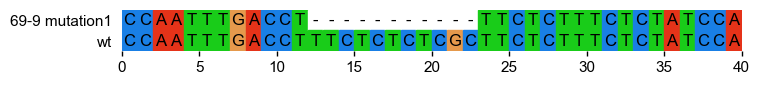

/home/witham/opt/anaconda3/envs/gene_feature_plot/lib/python3.9/site-packages/matplotlib/tight_bbox.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/witham/opt/anaconda3/envs/gene_feature_plot/lib/python3.9/site-packages/matplotlib/tight_bbox.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/witham/opt/anaconda3/envs/gene_feature_plot/lib/python3.9/site-packages/matplotlib/patches.py:769: RuntimeWarning: invalid value encountered in double_scalars
  y1 = self.convert_yunits(self._y0 + self._height)
/home/witham/opt/anaconda3/envs/gene_feature_plot/lib/python3.9/site-packages/matplotlib/transforms.py:2013: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[1, 2] += ty


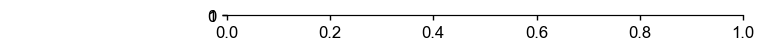

In [29]:
#read in the fasta file
location = '../../data/CRISPR_library/shortlist_mutations'
file1=f'{location}/69-9_nlp7_mutation1.fa'

# update rcparams
set_rc_params()
p = view_alignment(file1)


promoter_names=dict([('promoter_name1',"nlp7-at4g24020_ensembl_plant")])
#sort promoter names dictionary in alphabetical order
promoter_names = {k: v for k,v in sorted(promoter_names.items(), key=lambda item: item[0])}
# promoter_names=dict([('promoter_name7',"nlp7-at4g24020_ensembl_plant"),
#     ('promoter_name6',"nlp6-at1g64530_ensembl_plant"),
#     #('promoter_name9',"tga1-at5g65210_ensembl_plant"),
#     ('promoter_name3',"arf18-at3g61830_ensembl_plant"),
#     #('promoter_name3',"arf9-at4g23980_ensembl_plant"),
#     ('promoter_name1',"anac032-at1g77450_ensembl_plant"),
#     ('promoter_name2',"anr1-at2g14210_ensembl_plant"),
#     ('promoter_name4',"dreb26-at1g21910_ensembl_plant"),
#     ('promoter_name5',"nir1-at2g15620_ensembl_plant")])
#create empty dictionary
seqrecords = {}
#Define the number of bp downstream of the TSS to include.
#Any sequence further downstream will be trimmed. Any sequence upstream of the promoter annotation will be trimmed
bp_downstream_of_TSS = 1000
for k,v in promoter_names.items():             
    #add to new dictionary of seqrecords
    seqrecords[k] = gb_file_to_seqrecord(v,bp_downstream_of_TSS)
#make plot
make_plot(seqrecords,promoter_names,location,bp_downstream_of_TSS,openchromatin=False,dnaseI=False)